In [1]:
import pandas as pd
import numpy as np

# Полезные функции

## Цикл for

In [6]:
for i in range(5):
    print(i)

0
1
2
3
4


Здесь range - функция, которая создает списки с арифметической прогрессией. Отметим, что range - это именно *функция*, а не массив, то есть она не занимает память.
В общем виде она записывается так: **range[старт, стоп, шаг)** - обратите внимание на открытый и закртый интервалы

In [9]:
for i in range(2,11,2):
    print(i)

2
4
6
8
10


## Списки

In [16]:
mylist = [] # созднание пустого листа, эквивалент mylist = list()

for i in range(4,8):
    mylist.append(i) 

# метод append добавляет элемент в конец списка. 
# Этот метод изменяет сам список, то есть НЕ НУЖНО писать mylist = mylist.append(i)

In [17]:
print(min(mylist))
print(max(mylist))
print(len(mylist)) # длина списка

4
7
4


По списку можно пройтись циклом:

In [18]:
for i in mylist:
    print(i)

4
5
6
7


ПО любому списку, не обязательно int!

In [19]:
for word in ['Data','Science']:
    print(word)

Data
Science


## Numpy

Библиотека Numpy предназначена в первую очередь для работы с векторами и матрицами. Подробно рассматривать её у нас нет возможности, глянем только на несколько функций.

### Создание массивов

In [41]:
a1 = np.zeros(4)
a1

array([0., 0., 0., 0.])

In [42]:
a2 = np.zeros([3,4])
a2

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

То же самое с единицами:

In [43]:
a3 = np.ones(4)
a3

array([1., 1., 1., 1.])

In [44]:
a4 = np.ones([3,4])
a4

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

### Арифметические операции

In [49]:
a5 = a3*2 + a1*10 # Векторы можно напрямую складывать, без цикла по каждому жлементу
a5

array([2., 2., 2., 2.])

In [50]:
a5 += 10 # прибавление скаляра к вектору равноначно прибавлению скаляра к каждому элементу
a5

array([12., 12., 12., 12.])

In [51]:
a5 *= a5
a5

array([144., 144., 144., 144.])

In [52]:
a6 = a5/25
a6

array([5.76, 5.76, 5.76, 5.76])

# Новый датасет - цифры

In [75]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# The digits dataset
digits = datasets.load_digits()

Данные представлены в формате словаря. Сначала вспомним/узнаем, что это.

In [88]:
mydict = {'key0':'value0', 'key1':[1,2,3], 2:3.1415}

In [83]:
mydict['key0']

'value0'

In [86]:
mydict['key1']

[1, 2, 3]

In [87]:
mydict['key1'][2]

3

In [89]:
mydict[2]

3.1415

In [90]:
mydict.keys()

dict_keys(['key0', 'key1', 2])

In [91]:
mydict.values()

dict_values(['value0', [1, 2, 3], 3.1415])

Возвращаемся к нашему датасету

In [79]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

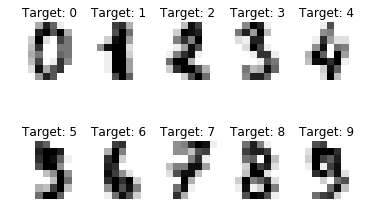

In [310]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(digits['images'][i], cmap=plt.cm.gray_r)
    plt.title('Target: %i' % digits['target'][i])

In [80]:
digits['data'].shape

(1797, 64)

Посмотрим непосредственно на данные

In [95]:
digits['data'][7].reshape([8,8])

array([[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.],
       [ 0.,  0.,  7.,  7.,  4., 11., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  1.,  0.],
       [ 0.,  4.,  8.,  8., 15., 15.,  6.,  0.],
       [ 0.,  2., 11., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]])

# Опробуем разные модели

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [199]:
X = digits['data']
y = digits['target']

## Задание 1: напишите функцию, которая возвращает среднюю ошибку по кросс-валидации

In [202]:
def my_function(x, y):
    result = x*x + y*y
    return result

my_function(3,4)

25

## Задание 2: Посчитайте ошибку для трех классификаторов: логистической регрессии, дерева и леса

## Задание 3: Постройте график ошибки в зависимости от параметра n_estimators в случайном лесе

# Ошибки классификатора

In [205]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [274]:
indices = np.arange(len(X))
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, indices, test_size=0.33)

In [301]:
RFC = RandomForestClassifier(n_estimators=100)

In [302]:
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [303]:
y_pred = RFC.predict(X_test)

In [304]:
cm = confusion_matrix(y_pred, y_test, labels = [i for i in range(10)])

In [305]:
import seaborn as sns
import itertools
def plot_cm(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


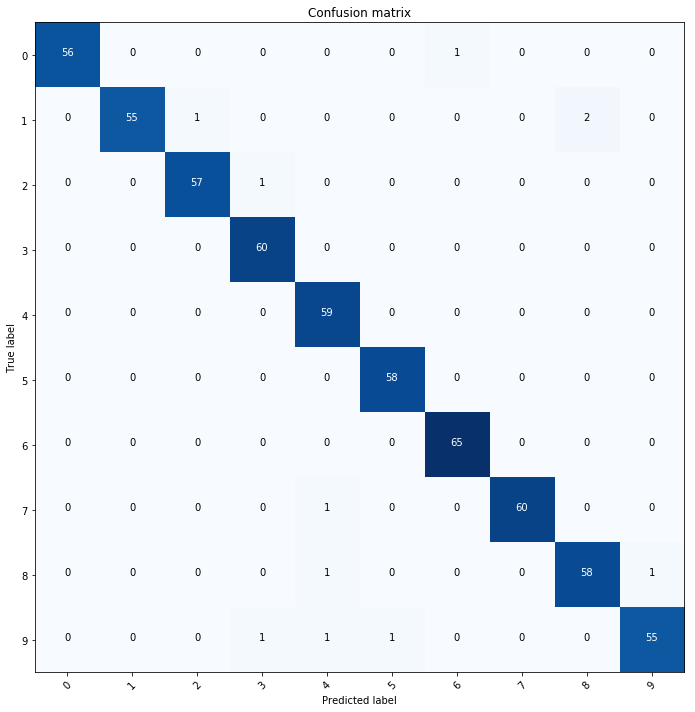

In [306]:
plot_cm(cm, classes = [str(i) for i in range(10)])

In [307]:
wrong_idx_test = np.where(y_test!=y_pred)[0]
wrong_idx = idx_test[np.where(y_test!=y_pred)[0]]

In [308]:
wrong_idx

array([ 843, 1660, 1216,    5, 1658, 1628,  129, 1299, 1605, 1611,  794])

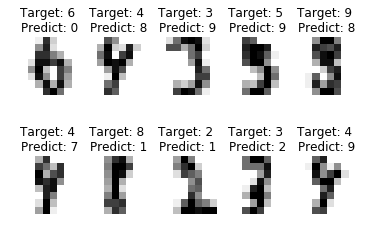

In [309]:
for i, index in enumerate(wrong_idx[0:10]):
    plt.subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(digits['images'][index], cmap=plt.cm.gray_r)
    plt.title('Target: {} \nPredict: {}'.format(digits['target'][index], y_pred[wrong_idx_test[i]]))